In [122]:
import numpy as np
import pandas as pd
from math import isnan
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [12,8]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

pd.options.display.max_columns =400
pd.options.display.max_rows =100

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Explore

## Data view

In [2]:
df_root = pd.read_excel('output\\2_data_select_byRaw.xlsx')
df_root.shape

(1019, 363)

In [3]:
df_root.columns

Index(['Unnamed: 0', '_id.$oid', 'data.details.sources_0.name', 'data.group',
       'data.group_id', 'data.unique_id', 'generated', 'import_type', 'status',
       'updated_at.$date.$numberLong',
       ...
       'data.rawProperties.antimicrobialProperties2.properties_7.items_0.unit',
       'data.rawProperties.antimicrobialProperties2.properties_8.name',
       'data.rawProperties.antimicrobialProperties2.properties_8.value',
       'data.rawProperties.antimicrobialProperties2.properties_8.items_0.value',
       'data.rawProperties.antimicrobialProperties2.properties_8.items_0.unit',
       'data.rawProperties.antimicrobialProperties2.properties_9.name',
       'data.rawProperties.antimicrobialProperties2.properties_9.value',
       'data.rawProperties.antimicrobialProperties2.properties_9.items_0.value',
       'data.rawProperties.antimicrobialProperties2.properties_9.items_0.unit',
       'data.rawProperties.antimicrobialProperties2.properties'],
      dtype='object', length=363)

### Null values

In [4]:
total_null = df_root.isnull().sum()
count_null = df_root.isnull().count()
percent_null = (total_null/count_null)*100
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null [ctd]', 'Percent_null [%]'])
missing_data.T

,Unnamed: 0,_id.$oid,data.details.sources_0.name,data.group,data.group_id,data.unique_id,generated,import_type,status,updated_at.$date.$numberLong,created_at.$date.$numberLong,data.name,data.methods_0.description,data.details.prepTime,data.ambientConditions.temperature,data.ambientConditions.humidity,data.ingredients_0.label,data.ingredients_0.value_amount,data.ingredients_0.unit_value,data.ingredients_1.label,data.ingredients_1.value_amount,data.ingredients_1.unit_value,data.ingredients_2.label,data.ingredients_2.value_amount,data.ingredients_2.unit_value,data.ingredients_3.label,data.ingredients_3.value_amount,data.ingredients_3.unit_value,data.ingredients_4.label,data.ingredients_4.value_amount,data.ingredients_4.unit_value,data.ingredients_5.label,data.ingredients_5.value_amount,data.ingredients_5.unit_value,data.rawProperties.mechanicalTensionProperties.name,data.rawProperties.mechanicalTensionProperties.value,data.rawProperties.mechanicalTensionProperties.properties_0.name,data.rawProperties.mechanicalTensionProperties.properties_0.value,data.rawProperties.mechanicalTensionProperties.properties_0.items_0.value,data.rawProperties.mechanicalTensionProperties.properties_0.items_0.unit,data.rawProperties.mechanicalTensionProperties.properties_1.name,data.rawProperties.mechanicalTensionProperties.properties_1.value,data.rawProperties.mechanicalTensionProperties.properties_1.items_0.value,data.rawProperties.mechanicalTensionProperties.properties_1.items_0.unit,data.rawProperties.mechanicalTensionProperties.properties_2.name,data.rawProperties.mechanicalTensionProperties.properties_2.value,data.rawProperties.mechanicalTensionProperties.properties_2.items_0.value,data.rawProperties.mechanicalTensionProperties.properties_2.items_0.unit,data.rawProperties.mechanicalTensionProperties.properties,data.rawProperties.mechanicalOtherProperties.name,data.rawProperties.mechanicalOtherProperties.value,data.rawProperties.mechanicalOtherProperties.properties_0.name,data.rawProperties.mechanicalOtherProperties.properties_0.value,data.rawProperties.mechanicalOtherProperties.properties_0.items_0.value,data.rawProperties.mechanicalOtherProperties.properties_0.items_0.unit,data.rawProperties.mechanicalOtherProperties.properties_1.name,data.rawProperties.mechanicalOtherProperties.properties_1.value,data.rawProperties.mechanicalOtherProperties.properties_1.items_0.value,data.rawProperties.mechanicalOtherProperties.properties_1.items_0.unit,data.rawProperties.mechanicalOtherProperties.properties_2.name,data.rawProperties.mechanicalOtherProperties.properties_2.value,data.rawProperties.mechanicalOtherProperties.properties_2.items_0.value,data.rawProperties.mechanicalOtherProperties.properties_2.items_0.unit,data.rawProperties.mechanicalOtherProperties.properties_3.name,data.rawProperties.mechanicalOtherProperties.properties_3.value,data.rawProperties.mechanicalOtherProperties.properties_3.items_0.value,data.rawProperties.mechanicalOtherProperties.properties_3.items_0.unit,data.rawProperties.mechanicalOtherProperties.properties_4.name,data.rawProperties.mechanicalOtherProperties.properties_4.value,data.rawProperties.mechanicalOtherProperties.properties_4.items_0.value,data.rawProperties.mechanicalOtherProperties.properties_4.items_0.unit,data.rawProperties.mechanicalOtherProperties.properties_5.name,data.rawProperties.mechanicalOtherProperties.properties_5.value,data.rawProperties.mechanicalOtherProperties.properties_5.items_0.value,data.rawProperties.mechanicalOtherProperties.properties_5.items_0.unit,data.rawProperties.mechanicalOtherProperties.properties_6.name,data.rawProperties.mechanicalOtherProperties.properties_6.value,data.rawProperties.mechanicalOtherProperties.properties_6.items_0.value,data.rawProperties.mechanicalOtherProperties.properties_6.items_0.unit,data.rawProperties.mechanicalOtherProperties.properties,data.rawProperties.physicalProperties.name,data.rawProperties.physicalProperties.value,data.rawProperties.physicalProperties.propert

In [5]:
missing_data[missing_data['Percent_null [%]']<90].shape
missing_data[missing_data['Percent_null [%]']<90]

(71, 2)

,Total_null [ctd],Percent_null [%]
Unnamed: 0,0,0.000000
_id.$oid,0,0.000000
data.details.sources_0.name,463,45.436703
data.group,471,46.221786
data.group_id,471,46.221786
data.unique_id,527,51.717370
generated,503,49.362120
import_type,361,35.426889
status,0,0.000000
updated_at.$date.$numberLong,0,0.000000


## Data prepare

In [6]:
df_ident = df_root.iloc[:,:10]
df_ident.shape
df_ident.columns

(1019, 10)

Index(['Unnamed: 0', '_id.$oid', 'data.details.sources_0.name', 'data.group',
       'data.group_id', 'data.unique_id', 'generated', 'import_type', 'status',
       'updated_at.$date.$numberLong'],
      dtype='object')

### Dataframe of ingredients

In [7]:
df_ingr = df_root.iloc[:,11:34]
df_ingr.shape
df_ingr.columns

(1019, 23)

Index(['data.name', 'data.methods_0.description', 'data.details.prepTime',
       'data.ambientConditions.temperature', 'data.ambientConditions.humidity',
       'data.ingredients_0.label', 'data.ingredients_0.value_amount',
       'data.ingredients_0.unit_value', 'data.ingredients_1.label',
       'data.ingredients_1.value_amount', 'data.ingredients_1.unit_value',
       'data.ingredients_2.label', 'data.ingredients_2.value_amount',
       'data.ingredients_2.unit_value', 'data.ingredients_3.label',
       'data.ingredients_3.value_amount', 'data.ingredients_3.unit_value',
       'data.ingredients_4.label', 'data.ingredients_4.value_amount',
       'data.ingredients_4.unit_value', 'data.ingredients_5.label',
       'data.ingredients_5.value_amount', 'data.ingredients_5.unit_value'],
      dtype='object')

In [8]:
ingr_uniques = list(pd.concat([df_ingr['data.ingredients_0.label'], 
                               df_ingr['data.ingredients_1.label'], 
                               df_ingr['data.ingredients_2.label'], 
                               df_ingr['data.ingredients_3.label'], 
                               df_ingr['data.ingredients_4.label'], 
                               df_ingr['data.ingredients_5.label']]).unique())
ingr_uniques.remove(np.nan)
len(ingr_uniques)
ingr_uniques

348

['Polyvinyl Alcohol ',
 '1.125',
 'Gelatin ',
 'Sodium Alginate',
 'Carrageenan',
 'Poly(vinyl) Alcohol',
 'Elephant foot yam starch',
 'Elephant Foot Yam Starch',
 'Alginate ',
 'Low-density polyethylene',
 'Organic Powdered Cottonii',
 'Ipomoea batatas',
 'Starch (higher)',
 'Lower Starch ',
 'Gum Ghatti',
 'Carragenine',
 'Poly(L-lactic acid)',
 'Egg White Protein',
 'Carboxymethyl Cellulose',
 'Gelatin',
 'Sodium alginate',
 'Carboxymethyl cellulose',
 'Fish gelatin',
 'xanthan gum',
 'sodium alginate',
 'Hydroxypropyl cassava starch powder',
 'Rice starch',
 'Sodium Alginate ',
 'alginate',
 'sodium Carboxymethyl Cellulose',
 'Alginate',
 'iota carrageenan-based',
 'SiO2',
 'ZnO',
 'Cassava starch',
 'Starch',
 'Carrageenan solution acetic acid',
 'Sorbitol',
 'Gum kondagogu',
 'macroalgae',
 'Poly lactic Acid ',
 '-',
 'RIce',
 'Rice ',
 'Rcie ',
 'Rice',
 'Polymethylmethacrylate',
 'Chitosan',
 'Keratin',
 'Banana Peel',
 'Seaweed ',
 'Crab carapaces, Cancer paguru',
 'Common Mu

In [9]:
grid_df_ingr = pd.DataFrame(columns=ingr_uniques)
for index, value in df_ingr.iterrows():
    ingre = {value['data.ingredients_0.label']:value['data.ingredients_0.value_amount'],
             value['data.ingredients_1.label']:value['data.ingredients_1.value_amount'], 
             value['data.ingredients_2.label']:value['data.ingredients_2.value_amount'], 
             value['data.ingredients_3.label']:value['data.ingredients_4.value_amount'], 
             value['data.ingredients_4.label']:value['data.ingredients_5.value_amount']}
    # Filtrado para eliminar las claves NaN del diccionario
    ingre = {k: v for k, v in ingre.items() if pd.notna(k)}
    ingr_df = pd.DataFrame([ingre], index=[index])
    grid_df_ingr = pd.concat([grid_df_ingr,ingr_df], axis=0)
#grid_df_ingr.drop(np.nan,axis=1,inplace=True)
## Modify Nan values
#grid_df_ingr = grid_df.fillna(0)

grid_df_ingr

,Polyvinyl Alcohol,1.125,Gelatin,Sodium Alginate,Carrageenan,Poly(vinyl) Alcohol,Elephant foot yam starch,Elephant Foot Yam Starch,Alginate,Low-density polyethylene,Organic Powdered Cottonii,Ipomoea batatas,Starch (higher),Lower Starch,Gum Ghatti,Carragenine,Poly(L-lactic acid),Egg White Protein,Carboxymethyl Cellulose,Gelatin,Sodium alginate,Carboxymethyl cellulose,Fish gelatin,xanthan gum,sodium alginate,Hydroxypropyl cassava starch powder,Rice starch,Sodium Alginate,alginate,sodium Carboxymethyl Cellulose,Alginate,iota carrageenan-based,SiO2,ZnO,Cassava starch,Starch,Carrageenan solution acetic acid,Sorbitol,Gum kondagogu,macroalgae,Poly lactic Acid,-,RIce,Rice,Rcie,Rice,Polymethylmethacrylate,Chitosan,Keratin,Banana Peel,Seaweed,"Crab carapaces, Cancer paguru",Common Mushroom,Bracket fungus,"White button mushrooms , Agaricus bisporu","White button mushrooms, Agaricus bisporu","White button mushrooms, Agaricus bisporu",Poly Lactide Acid,Poly Lactic Acid,Montmorillonite,Pure Starch,Starch,Bamboo fibre,Chitin Nanofibres,Chitin–protein compositenanofibers,Agar agar,Glycerol,Mussel shells [Mytilus edulis],Water,Pine Resin,"Walnut shells, Juglans regia",Mussel shells [Mytilus chilensis],Green tea,Sawdust - Eucalyptus globulus Labill.,Damar resin,Dextrin,Wood ashes,Vinegar,Beer spent grain,Wheat flour [white],Coconut Fiber,Nettle plant,"Mica powder, 100 micron particle size or smaller",Eggshell,Tapioca starch (Cassava root skin),Oak 'Knopper' Gall,Dye bath (Japanese Knotweed leaves),Japanese knotweed leaves (yellow),Japanese Knotweed stems,Glycerin,Glutinous rice flour,Cardboard box waste,Natural Dyes,Oyster shells,Egg carton,Curcumin (Turmeric or Curcuma),Matcha Green Tea Powder,Jasmine Green Tea,Spirulina,Sodium Bicarbonate / Bicarbonate of soda,Peapod,Razor Clams,Banana peel,Polyvinyl Alcohol,Biochar,Carrageenan kappa,Scoby,Rosin,Wool Fiber,Wheat flour (white),Milk - skim,Guar gum powder,Sugarcane bagasse,Dry Leaves,Olive Pits (Ground),White vinegar,Sulphur Nanoparticles,Copper Sulfide,Glyoxal,Glutaraldehyde,agar–agar,Xanthan Gum,Glycerol,Grapefruit seed Extract,Polyethylene Glycol,Sorbital,Tomato Promace,Tomato Promace Poymerised,κ-carrageenan,Agar,Norbixin,Jaboticaba peel,Sodium Metabisulfite,κ-Carrageenan,Agar,Dialdehyde kappa-carrageenan,Tween-80,Tween-81,Tween-82,Tween-83,Tween-84,agar,Graphene oxide,Oxidum silicate,barbatimao microcapsules CD,barbatimao microcapsules CD /X,lyophilized extract of barbatimao,CD control microcapsules,CD/X control microcapsules,Collagen,glycerol,Carboxy Metyl cellulose,Supernatant,Lignin,acetate nanocellulose,HEMP,WEED,TOMATO,CAROB,PRUNED,Strch,Tri-calcium phosphate,Oxidized/Nanocellulose,Microcrystalline Cellulose,Commercial Microcrystalline Cellulose,Lemang Bamboo Microcrystalline Cellulose,Semantan bamboo Microcrystalline Cellulose,Tree bracket fungus,nanofibrillated cellulose,Montmorillonite,cellulose nanowhiskers,pure cellulose,lignocellulosic additives,Starch Resin,"acetylated, Kenaf fibres",chitosan matrix,chitosan matrix,Methanol,Ethanol,Acet,Sugar,Cork,"Mycelium spawn, Trametes Versicolor",Grape Pomace,Calcium carbonate,Cornstarch,Calcium Propionate,Local clay,Coffee grounds [used],Onion Skin,Sage leaves,Purple Cabbage,Carragheen Moss (dried),Paper (waste),Avocado pit and/or skin,Salt,"Water glass, 37% sodium silicate solution",Methylcellulose,Japanese Knotweed (Reynoutria japonica),Carrageenan Iota,Japanese Knotweed leaves (green),Grass (cut),Yerba mate (Ilex Paraguariensis),Butternut-squash pulp,Agar Agar,Dragon fruit / Pitaya / Selenicereus,Mangosteen (Garcinia mangostana),Pine cones,Noni Fruit Powder,Butterfly Pea Flower,Potato starch,Chamomile Flowers (dried),Raw Tung Oil,Tea Grounds (wasted),Marigold flowers,Hibiscus L,Beeswax pellets (food grade),Bull-Kelp,Chitin (Chitosan),Pomegranate,Almond oil,Carrageenan Kappa,Borage,Glycerin / glycerol,Casein,Sand,Pine resin,Gum arabic,Bone,Himalayan balsam,Red cabbage powder,NanoSilver,Shikonin,Propolis,Gold Nanoparticles,Graphene Oxide

In [10]:
grid_df_ingr.describe(include='all')

,Polyvinyl Alcohol,1.125,Gelatin,Sodium Alginate,Carrageenan,Poly(vinyl) Alcohol,Elephant foot yam starch,Elephant Foot Yam Starch,Alginate,Low-density polyethylene,Organic Powdered Cottonii,Ipomoea batatas,Starch (higher),Lower Starch,Gum Ghatti,Carragenine,Poly(L-lactic acid),Egg White Protein,Carboxymethyl Cellulose,Gelatin,Sodium alginate,Carboxymethyl cellulose,Fish gelatin,xanthan gum,sodium alginate,Hydroxypropyl cassava starch powder,Rice starch,Sodium Alginate,alginate,sodium Carboxymethyl Cellulose,Alginate,iota carrageenan-based,SiO2,ZnO,Cassava starch,Starch,Carrageenan solution acetic acid,Sorbitol,Gum kondagogu,macroalgae,Poly lactic Acid,-,RIce,Rice,Rcie,Rice,Polymethylmethacrylate,Chitosan,Keratin,Banana Peel,Seaweed,"Crab carapaces, Cancer paguru",Common Mushroom,Bracket fungus,"White button mushrooms , Agaricus bisporu","White button mushrooms, Agaricus bisporu","White button mushrooms, Agaricus bisporu",Poly Lactide Acid,Poly Lactic Acid,Montmorillonite,Pure Starch,Starch,Bamboo fibre,Chitin Nanofibres,Chitin–protein compositenanofibers,Agar agar,Glycerol,Mussel shells [Mytilus edulis],Water,Pine Resin,"Walnut shells, Juglans regia",Mussel shells [Mytilus chilensis],Green tea,Sawdust - Eucalyptus globulus Labill.,Damar resin,Dextrin,Wood ashes,Vinegar,Beer spent grain,Wheat flour [white],Coconut Fiber,Nettle plant,"Mica powder, 100 micron particle size or smaller",Eggshell,Tapioca starch (Cassava root skin),Oak 'Knopper' Gall,Dye bath (Japanese Knotweed leaves),Japanese knotweed leaves (yellow),Japanese Knotweed stems,Glycerin,Glutinous rice flour,Cardboard box waste,Natural Dyes,Oyster shells,Egg carton,Curcumin (Turmeric or Curcuma),Matcha Green Tea Powder,Jasmine Green Tea,Spirulina,Sodium Bicarbonate / Bicarbonate of soda,Peapod,Razor Clams,Banana peel,Polyvinyl Alcohol,Biochar,Carrageenan kappa,Scoby,Rosin,Wool Fiber,Wheat flour (white),Milk - skim,Guar gum powder,Sugarcane bagasse,Dry Leaves,Olive Pits (Ground),White vinegar,Sulphur Nanoparticles,Copper Sulfide,Glyoxal,Glutaraldehyde,agar–agar,Xanthan Gum,Glycerol,Grapefruit seed Extract,Polyethylene Glycol,Sorbital,Tomato Promace,Tomato Promace Poymerised,κ-carrageenan,Agar,Norbixin,Jaboticaba peel,Sodium Metabisulfite,κ-Carrageenan,Agar,Dialdehyde kappa-carrageenan,Tween-80,Tween-81,Tween-82,Tween-83,Tween-84,agar,Graphene oxide,Oxidum silicate,barbatimao microcapsules CD,barbatimao microcapsules CD /X,lyophilized extract of barbatimao,CD control microcapsules,CD/X control microcapsules,Collagen,glycerol,Carboxy Metyl cellulose,Supernatant,Lignin,acetate nanocellulose,HEMP,WEED,TOMATO,CAROB,PRUNED,Strch,Tri-calcium phosphate,Oxidized/Nanocellulose,Microcrystalline Cellulose,Commercial Microcrystalline Cellulose,Lemang Bamboo Microcrystalline Cellulose,Semantan bamboo Microcrystalline Cellulose,Tree bracket fungus,nanofibrillated cellulose,Montmorillonite,cellulose nanowhiskers,pure cellulose,lignocellulosic additives,Starch Resin,"acetylated, Kenaf fibres",chitosan matrix,chitosan matrix,Methanol,Ethanol,Acet,Sugar,Cork,"Mycelium spawn, Trametes Versicolor",Grape Pomace,Calcium carbonate,Cornstarch,Calcium Propionate,Local clay,Coffee grounds [used],Onion Skin,Sage leaves,Purple Cabbage,Carragheen Moss (dried),Paper (waste),Avocado pit and/or skin,Salt,"Water glass, 37% sodium silicate solution",Methylcellulose,Japanese Knotweed (Reynoutria japonica),Carrageenan Iota,Japanese Knotweed leaves (green),Grass (cut),Yerba mate (Ilex Paraguariensis),Butternut-squash pulp,Agar Agar,Dragon fruit / Pitaya / Selenicereus,Mangosteen (Garcinia mangostana),Pine cones,Noni Fruit Powder,Butterfly Pea Flower,Potato starch,Chamomile Flowers (dried),Raw Tung Oil,Tea Grounds (wasted),Marigold flowers,Hibiscus L,Beeswax pellets (food grade),Bull-Kelp,Chitin (Chitosan),Pomegranate,Almond oil,Carrageenan Kappa,Borage,Glycerin / glycerol,Casein,Sand,Pine resin,Gum arabic,Bone,Himalayan balsam,Red cabbage powder,NanoSilver,Shikonin,Propolis,Gold Nanoparticles,Graphene Oxide

### Dataframe properties

In [11]:
df_prop = df_root.iloc[:,35:]
df_prop.shape

(1019, 328)

In [13]:
# View 100 first
df_prop.columns[:100]

Index(['data.rawProperties.mechanicalTensionProperties.value',
       'data.rawProperties.mechanicalTensionProperties.properties_0.name',
       'data.rawProperties.mechanicalTensionProperties.properties_0.value',
       'data.rawProperties.mechanicalTensionProperties.properties_0.items_0.value',
       'data.rawProperties.mechanicalTensionProperties.properties_0.items_0.unit',
       'data.rawProperties.mechanicalTensionProperties.properties_1.name',
       'data.rawProperties.mechanicalTensionProperties.properties_1.value',
       'data.rawProperties.mechanicalTensionProperties.properties_1.items_0.value',
       'data.rawProperties.mechanicalTensionProperties.properties_1.items_0.unit',
       'data.rawProperties.mechanicalTensionProperties.properties_2.name',
       'data.rawProperties.mechanicalTensionProperties.properties_2.value',
       'data.rawProperties.mechanicalTensionProperties.properties_2.items_0.value',
       'data.rawProperties.mechanicalTensionProperties.properties_

In [14]:
prop_uniques = list(pd.concat([df_prop['data.rawProperties.mechanicalTensionProperties.properties_0.value'], 
                               df_prop['data.rawProperties.mechanicalTensionProperties.properties_1.value'], 
                               df_prop['data.rawProperties.mechanicalTensionProperties.properties_2.value']]).unique())
prop_uniques.remove(np.nan)
prop_uniques

['tensile_strength', "young's_modulus", 'elongation_at_break']

In [15]:
grid_df_prop = pd.DataFrame(columns=prop_uniques)
for index, value in df_prop.iterrows():
    propr = {value['data.rawProperties.mechanicalTensionProperties.properties_0.value']:value['data.rawProperties.mechanicalTensionProperties.properties_0.items_0.value'],
             value['data.rawProperties.mechanicalTensionProperties.properties_1.value']:value['data.rawProperties.mechanicalTensionProperties.properties_1.items_0.value'], 
             value['data.rawProperties.mechanicalTensionProperties.properties_2.value']:value['data.rawProperties.mechanicalTensionProperties.properties_2.items_0.value']}
    # Filtrado para eliminar las claves NaN del diccionario
    propr = {k: v for k, v in propr.items() if pd.notna(k)}
    propr_df = pd.DataFrame([propr], index=[index])
    grid_df_prop = pd.concat([grid_df_prop,propr_df], axis=0)
#grid_df_prop.drop(np.nan,axis=1,inplace=True)
## Modify Nan values
#grid_df_prop = grid_df_prop.fillna(0)

grid_df_prop

,tensile_strength,young's_modulus,elongation_at_break
0,42,NaN,152
1,45,NaN,56
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1014,NaN,NaN,NaN
1015,NaN,NaN,NaN
1016,NaN,NaN,NaN
1017,NaN,NaN,NaN


In [16]:
grid_df_prop.describe()

,tensile_strength,young's_modulus,elongation_at_break
count,326,194,313
unique,288,167,276
top,42,3500 ± 200,9.34±0.25
freq,4,3,4


#### All properties

In [106]:
# Función para manejar correctamente los nombres de las columnas
def get_unique_properties(df, prop_root):
    unique_props = {}
    for col in df.columns:
        if prop_root in col and '.value' in col and 'items_0' not in col:
            parts = col.split('.')
            if len(parts) > 1 and '_' in parts[-2]:
                prop_type, prop_idx = parts[-2].split('_')
                if prop_type == 'properties' and prop_idx.isdigit():
                    prop_key = f'{prop_type}_{prop_idx}'
                    if prop_key not in unique_props:
                        unique_props[prop_key] = []
                    unique_values = df[col].dropna().unique()
                    for val in unique_values:
                        if val not in unique_props[prop_key]:
                            unique_props[prop_key].append(val)
    return unique_props

# Función para construir el DataFrame del tipo de propiedad
def build_properties_df(df, unique_props, prop_root):
    # Crear un DataFrame vacío con los índices del DataFrame original
    new_df = pd.DataFrame(index=df.index)
    
    # Agregar columnas al DataFrame nuevo para cada propiedad única
    for values in unique_props.values():
        for value in values:
            new_df[value] = np.nan  # Inicializar con NaNs
            
    # Llenar el nuevo DataFrame con los valores correspondientes
    for idx, row in df.iterrows():
        for prop_key, values in unique_props.items():
            prop_value_col = f'{prop_root}.{prop_key}.value'
            prop_items_value_col = f'{prop_root}.{prop_key}.items_0.value'
            
            # Si la propiedad está presente en la fila actual, establecer el valor
            if pd.notna(row[prop_value_col]):
                prop_name = row[prop_value_col]
                if prop_name in new_df.columns:
                    prop_value = row[prop_items_value_col]
                    new_df.at[idx, prop_name] = prop_value
                
    return new_df

def add_prefix_to_columns(df, prefix):
    # Actualizar los nombres de las columnas para incluir prefijo
    df.columns = [f'{prefix}.{col}' for col in df.columns]
    return df

In [109]:
def process_all_properties(df_prop, base_root='data.rawProperties'):
    # Identificar todos los tipos de propiedades únicos en el DataFrame
    proper_list = []
    for col in df_prop.columns:
        proper_type = col.split('.')[2]
        proper_list.append(proper_type)
    proper_set = set(proper_list)
    
    # DataFrame final que consolidará todos los datos
    final_df = pd.DataFrame(index=df_prop.index)
    
    # Procesar cada tipo de propiedad y agregar los datos al DataFrame final
    for proper_type in proper_set:
        prop_root = f'{base_root}.{proper_type}'
        unique_props = get_unique_properties(df_prop, prop_root)
        grid_df_prop = build_properties_df(df_prop, unique_props, prop_root)
        grid_df_prop = add_prefix_to_columns(grid_df_prop, prop_root)
        
        # Combinar el nuevo DataFrame con el final
        final_df = pd.concat([final_df, grid_df_prop], axis=1)
    
    return final_df

In [111]:
final_prop_df = process_all_properties(df_prop)
final_prop_df.columns

Index(['data.rawProperties.opticalProperties.colour_difference',
       'data.rawProperties.opticalProperties.transparency',
       'data.rawProperties.opticalProperties.light_transmittence_values300nm',
       'data.rawProperties.opticalProperties.light_transmittence_values200nm',
       'data.rawProperties.opticalProperties.transmittance',
       'data.rawProperties.opticalProperties.opacity',
       'data.rawProperties.opticalProperties.whitness_index',
       'data.rawProperties.opticalProperties.light_transmittence_values_t280',
       'data.rawProperties.opticalProperties.light_transmittence_values600nm',
       'data.rawProperties.opticalProperties.clarity',
       ...
       'data.rawProperties.mechanicalOtherProperties.ultimate_elongation',
       'data.rawProperties.mechanicalOtherProperties.shear_force',
       'data.rawProperties.mechanicalOtherProperties.bulk_modulus',
       'data.rawProperties.mechanicalOtherProperties.tensile_index',
       'data.rawProperties.mechanica

In [112]:
final_prop_df.describe(include='all')

,data.rawProperties.opticalProperties.colour_difference,data.rawProperties.opticalProperties.transparency,data.rawProperties.opticalProperties.light_transmittence_values300nm,data.rawProperties.opticalProperties.light_transmittence_values200nm,data.rawProperties.opticalProperties.transmittance,data.rawProperties.opticalProperties.opacity,data.rawProperties.opticalProperties.whitness_index,data.rawProperties.opticalProperties.light_transmittence_values_t280,data.rawProperties.opticalProperties.light_transmittence_values600nm,data.rawProperties.opticalProperties.clarity,data.rawProperties.opticalProperties.light_transmittence,data.rawProperties.opticalProperties.light_transmittence_values_t660,data.rawProperties.opticalProperties.light_transmittence_values350nm,data.rawProperties.opticalProperties.haze,data.rawProperties.opticalProperties.light_transmittence_values400nm,data.rawProperties.opticalProperties.light_transmittence_values500nm,data.rawProperties.opticalProperties.light_transmittence_values800nm,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index0_day,data.rawProperties.antioxidantProperties.leaching_losses,data.rawProperties.antioxidantProperties.antioxidant_activity_d_p_p_h,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index3_day,data.rawProperties.antioxidantProperties.antioxidant_activity_a_b_t_s,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index7_day,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index9_day,data.rawProperties.antioxidantProperties.a_t_t_c43300,data.rawProperties.antioxidantProperties.a_t_t_c25922,data.rawProperties.antioxidantProperties.a_t_t_c14028,data.rawProperties.antioxidantProperties.a_t_t_c35667,data.rawProperties.antioxidantProperties.a_t_t_c70060,data.rawProperties.antioxidantProperties.a_t_t_c29212,data.rawProperties.barrierProperties.water_vapour_transmission_rate,data.rawProperties.barrierProperties.water_vapour_permeabilty_coefficient,data.rawProperties.barrierProperties.air_permeability,data.rawProperties.barrierProperties.critical_surface_tension,data.rawProperties.barrierProperties.olive_oil_penetration,data.rawProperties.barrierProperties.water_vapour_permeabilty,data.rawProperties.barrierProperties.oxygen_transmission_rate,data.rawProperties.barrierProperties.oxygen_permeability,data.rawProperties.antimicrobialProperties2.antimicrobial_time,data.rawProperties.antimicrobialProperties2.l._monocytogenes,data.rawProperties.antimicrobialProperties2.e._coli,data.rawProperties.antimicrobialProperties2.staphylococcus_aureus_a_t_c_c6538,data.rawProperties.antimicrobialProperties2.staphylococcus_aureus_a_t_c_c43300,data.rawProperties.antimicrobialProperties2.bacillus_subtilis_b29,data.rawProperties.antimicrobialProperties2.s._aureus,data.rawProperties.thermalProperties.melting_temperator,data.rawProperties.thermalProperties.maximum_temperature,data.rawProperties.thermalProperties.onset_temperature,data.rawProperties.thermalProperties.thermal_stability/_thermal_degregation,data.rawProperties.thermalProperties.peak_endothermic,data.rawProperties.thermalProperties.degredation_temperature,data.rawProperties.thermalProperties.peak_exothermic,data.rawProperties.thermalProperties.glass_transition_temperature,data.rawProperties.thermalProperties.experimental_residue_content_at600°_c,data.rawProperties.thermalProperties.crystallization_temperature,data.rawProperties.thermalProperties.theoretical_residue_content,data.rawProperties.thermalProperties.enthalpy_point,data.rawProperties.antimicrobialProperties.antimicrobial_time,data.rawProperties.antimicrobialProperties.l._monocytogenes,data.rawProperties.antimicrobialProperties.e._coli,data.rawProperties.antimicrobialProperties.staphylococcus_aureus_a_t_c_c6538,data.rawProperties.antimicrobialProperties.staphylococcus_aureus_a_t_c_c43300,data.rawProperties.antimicrobialProperties.bacillus_subtilis_b29,data.rawProperties.antimicrobialP

## Research questions

**¿What's the materials frecuency?**

(348,)

<Axes: >

Text(0, 0.5, 'N° Records')

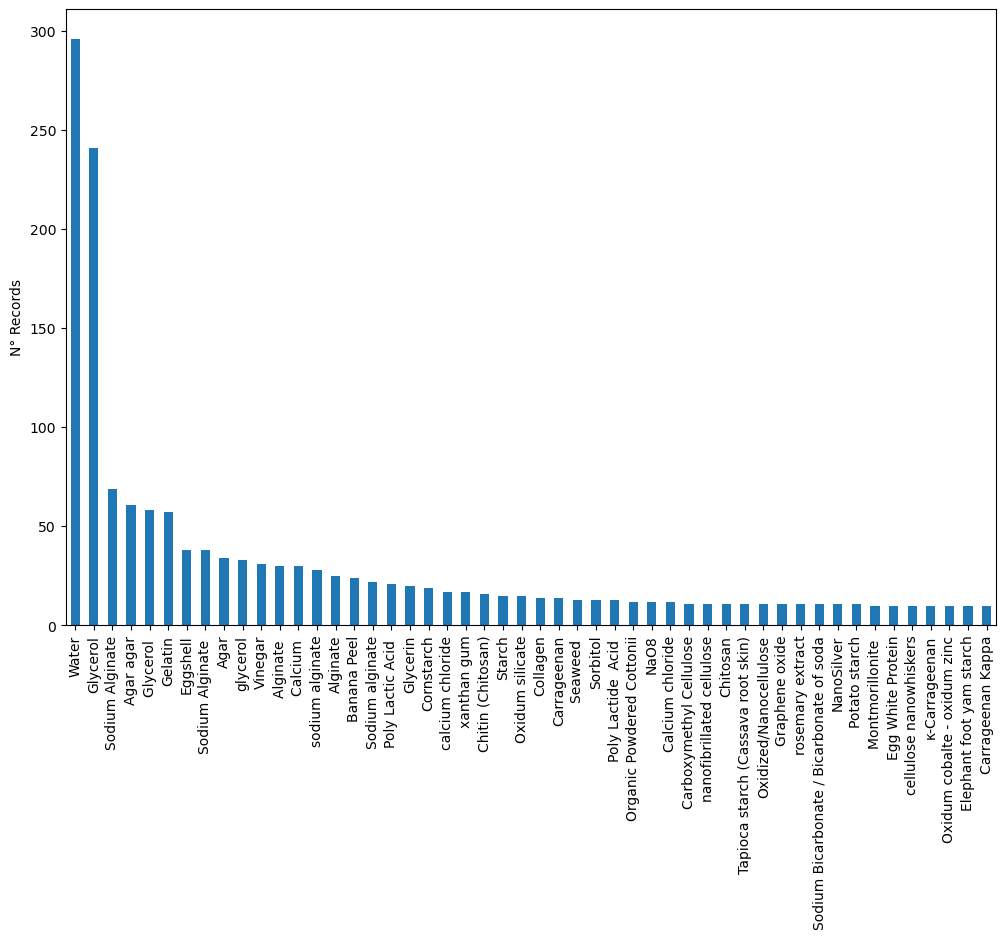

In [12]:
materials_count = grid_df_ingr.describe(include='all').T['count'].sort_values(ascending=False)
materials_count.shape
materials_count[:50].plot(kind="bar")
plt.ylabel('N° Records')

**¿What's the properties frecuency?**

(133,)

<Axes: >

Text(0, 0.5, 'N° Records')

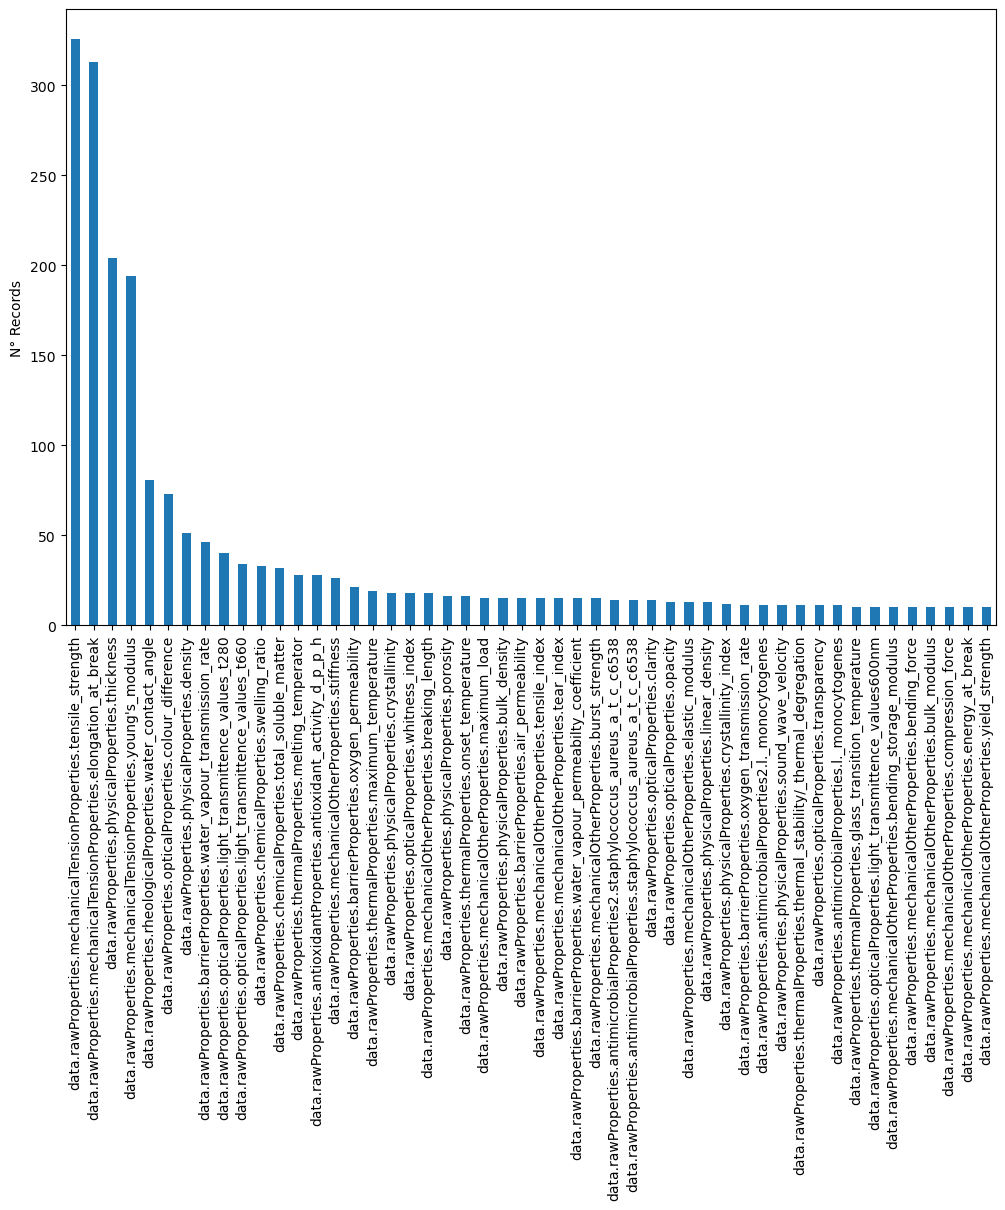

In [113]:
propr_count = final_prop_df.describe(include='all').T['count'].sort_values(ascending=False)
propr_count.shape
propr_count[:50].plot(kind="bar")
plt.ylabel('N° Records')

**¿How many articles are included in the data?**

(70,)

<Axes: xlabel='data.details.sources_0.name'>

Text(0, 0.5, 'N° Records')

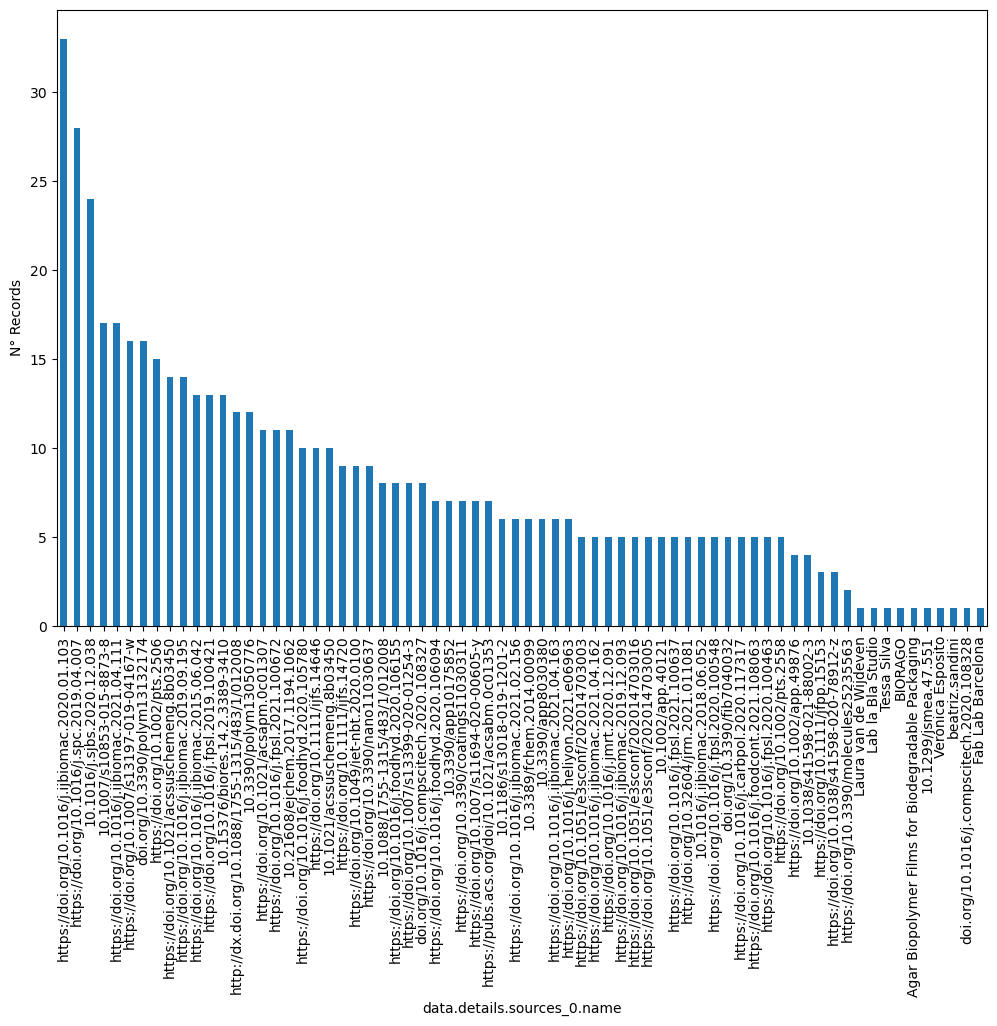

In [11]:
groupby_doi = df_root.groupby(by=['data.details.sources_0.name'])
doi_count = groupby_doi['Unnamed: 0'].count().sort_values(ascending=False)
doi_count.shape
doi_count.plot(kind="bar")
plt.ylabel('N° Records')

**¿How the property report is distributed?**

In [116]:
df_aux = pd.concat([df_ident,final_prop_df],axis=1)
df_aux

,Unnamed: 0,_id.$oid,data.details.sources_0.name,data.group,data.group_id,data.unique_id,generated,import_type,status,updated_at.$date.$numberLong,data.rawProperties.opticalProperties.colour_difference,data.rawProperties.opticalProperties.transparency,data.rawProperties.opticalProperties.light_transmittence_values300nm,data.rawProperties.opticalProperties.light_transmittence_values200nm,data.rawProperties.opticalProperties.transmittance,data.rawProperties.opticalProperties.opacity,data.rawProperties.opticalProperties.whitness_index,data.rawProperties.opticalProperties.light_transmittence_values_t280,data.rawProperties.opticalProperties.light_transmittence_values600nm,data.rawProperties.opticalProperties.clarity,data.rawProperties.opticalProperties.light_transmittence,data.rawProperties.opticalProperties.light_transmittence_values_t660,data.rawProperties.opticalProperties.light_transmittence_values350nm,data.rawProperties.opticalProperties.haze,data.rawProperties.opticalProperties.light_transmittence_values400nm,data.rawProperties.opticalProperties.light_transmittence_values500nm,data.rawProperties.opticalProperties.light_transmittence_values800nm,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index0_day,data.rawProperties.antioxidantProperties.leaching_losses,data.rawProperties.antioxidantProperties.antioxidant_activity_d_p_p_h,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index3_day,data.rawProperties.antioxidantProperties.antioxidant_activity_a_b_t_s,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index7_day,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index9_day,data.rawProperties.antioxidantProperties.a_t_t_c43300,data.rawProperties.antioxidantProperties.a_t_t_c25922,data.rawProperties.antioxidantProperties.a_t_t_c14028,data.rawProperties.antioxidantProperties.a_t_t_c35667,data.rawProperties.antioxidantProperties.a_t_t_c70060,data.rawProperties.antioxidantProperties.a_t_t_c29212,data.rawProperties.barrierProperties.water_vapour_transmission_rate,data.rawProperties.barrierProperties.water_vapour_permeabilty_coefficient,data.rawProperties.barrierProperties.air_permeability,data.rawProperties.barrierProperties.critical_surface_tension,data.rawProperties.barrierProperties.olive_oil_penetration,data.rawProperties.barrierProperties.water_vapour_permeabilty,data.rawProperties.barrierProperties.oxygen_transmission_rate,data.rawProperties.barrierProperties.oxygen_permeability,data.rawProperties.antimicrobialProperties2.antimicrobial_time,data.rawProperties.antimicrobialProperties2.l._monocytogenes,data.rawProperties.antimicrobialProperties2.e._coli,data.rawProperties.antimicrobialProperties2.staphylococcus_aureus_a_t_c_c6538,data.rawProperties.antimicrobialProperties2.staphylococcus_aureus_a_t_c_c43300,data.rawProperties.antimicrobialProperties2.bacillus_subtilis_b29,data.rawProperties.antimicrobialProperties2.s._aureus,data.rawProperties.thermalProperties.melting_temperator,data.rawProperties.thermalProperties.maximum_temperature,data.rawProperties.thermalProperties.onset_temperature,data.rawProperties.thermalProperties.thermal_stability/_thermal_degregation,data.rawProperties.thermalProperties.peak_endothermic,data.rawProperties.thermalProperties.degredation_temperature,data.rawProperties.thermalProperties.peak_exothermic,data.rawProperties.thermalProperties.glass_transition_temperature,data.rawProperties.thermalProperties.experimental_residue_content_at600°_c,data.rawProperties.thermalProperties.crystallization_temperature,data.rawProperties.thermalProperties.theoretical_residue_content,data.rawProperties.thermalProperties.enthalpy_point,data.rawProperties.antimicrobialProperties.antimicrobial_time,data.rawProperties.antimicrobialProperties.l._monocytogenes,data.rawProperties.antimicrobialProperties.e._coli,data.rawProperties.antimicrobialProperties.staphylococcus_aureus_a_t_c_c6538,data.rawProperties.antimicrobi

In [138]:
grouped_data = df_aux.groupby('data.details.sources_0.name').apply(lambda df: df.notnull().sum())
grouped_data.drop(columns=df_ident.columns, inplace=True)
grouped_data.reset_index(inplace=True)

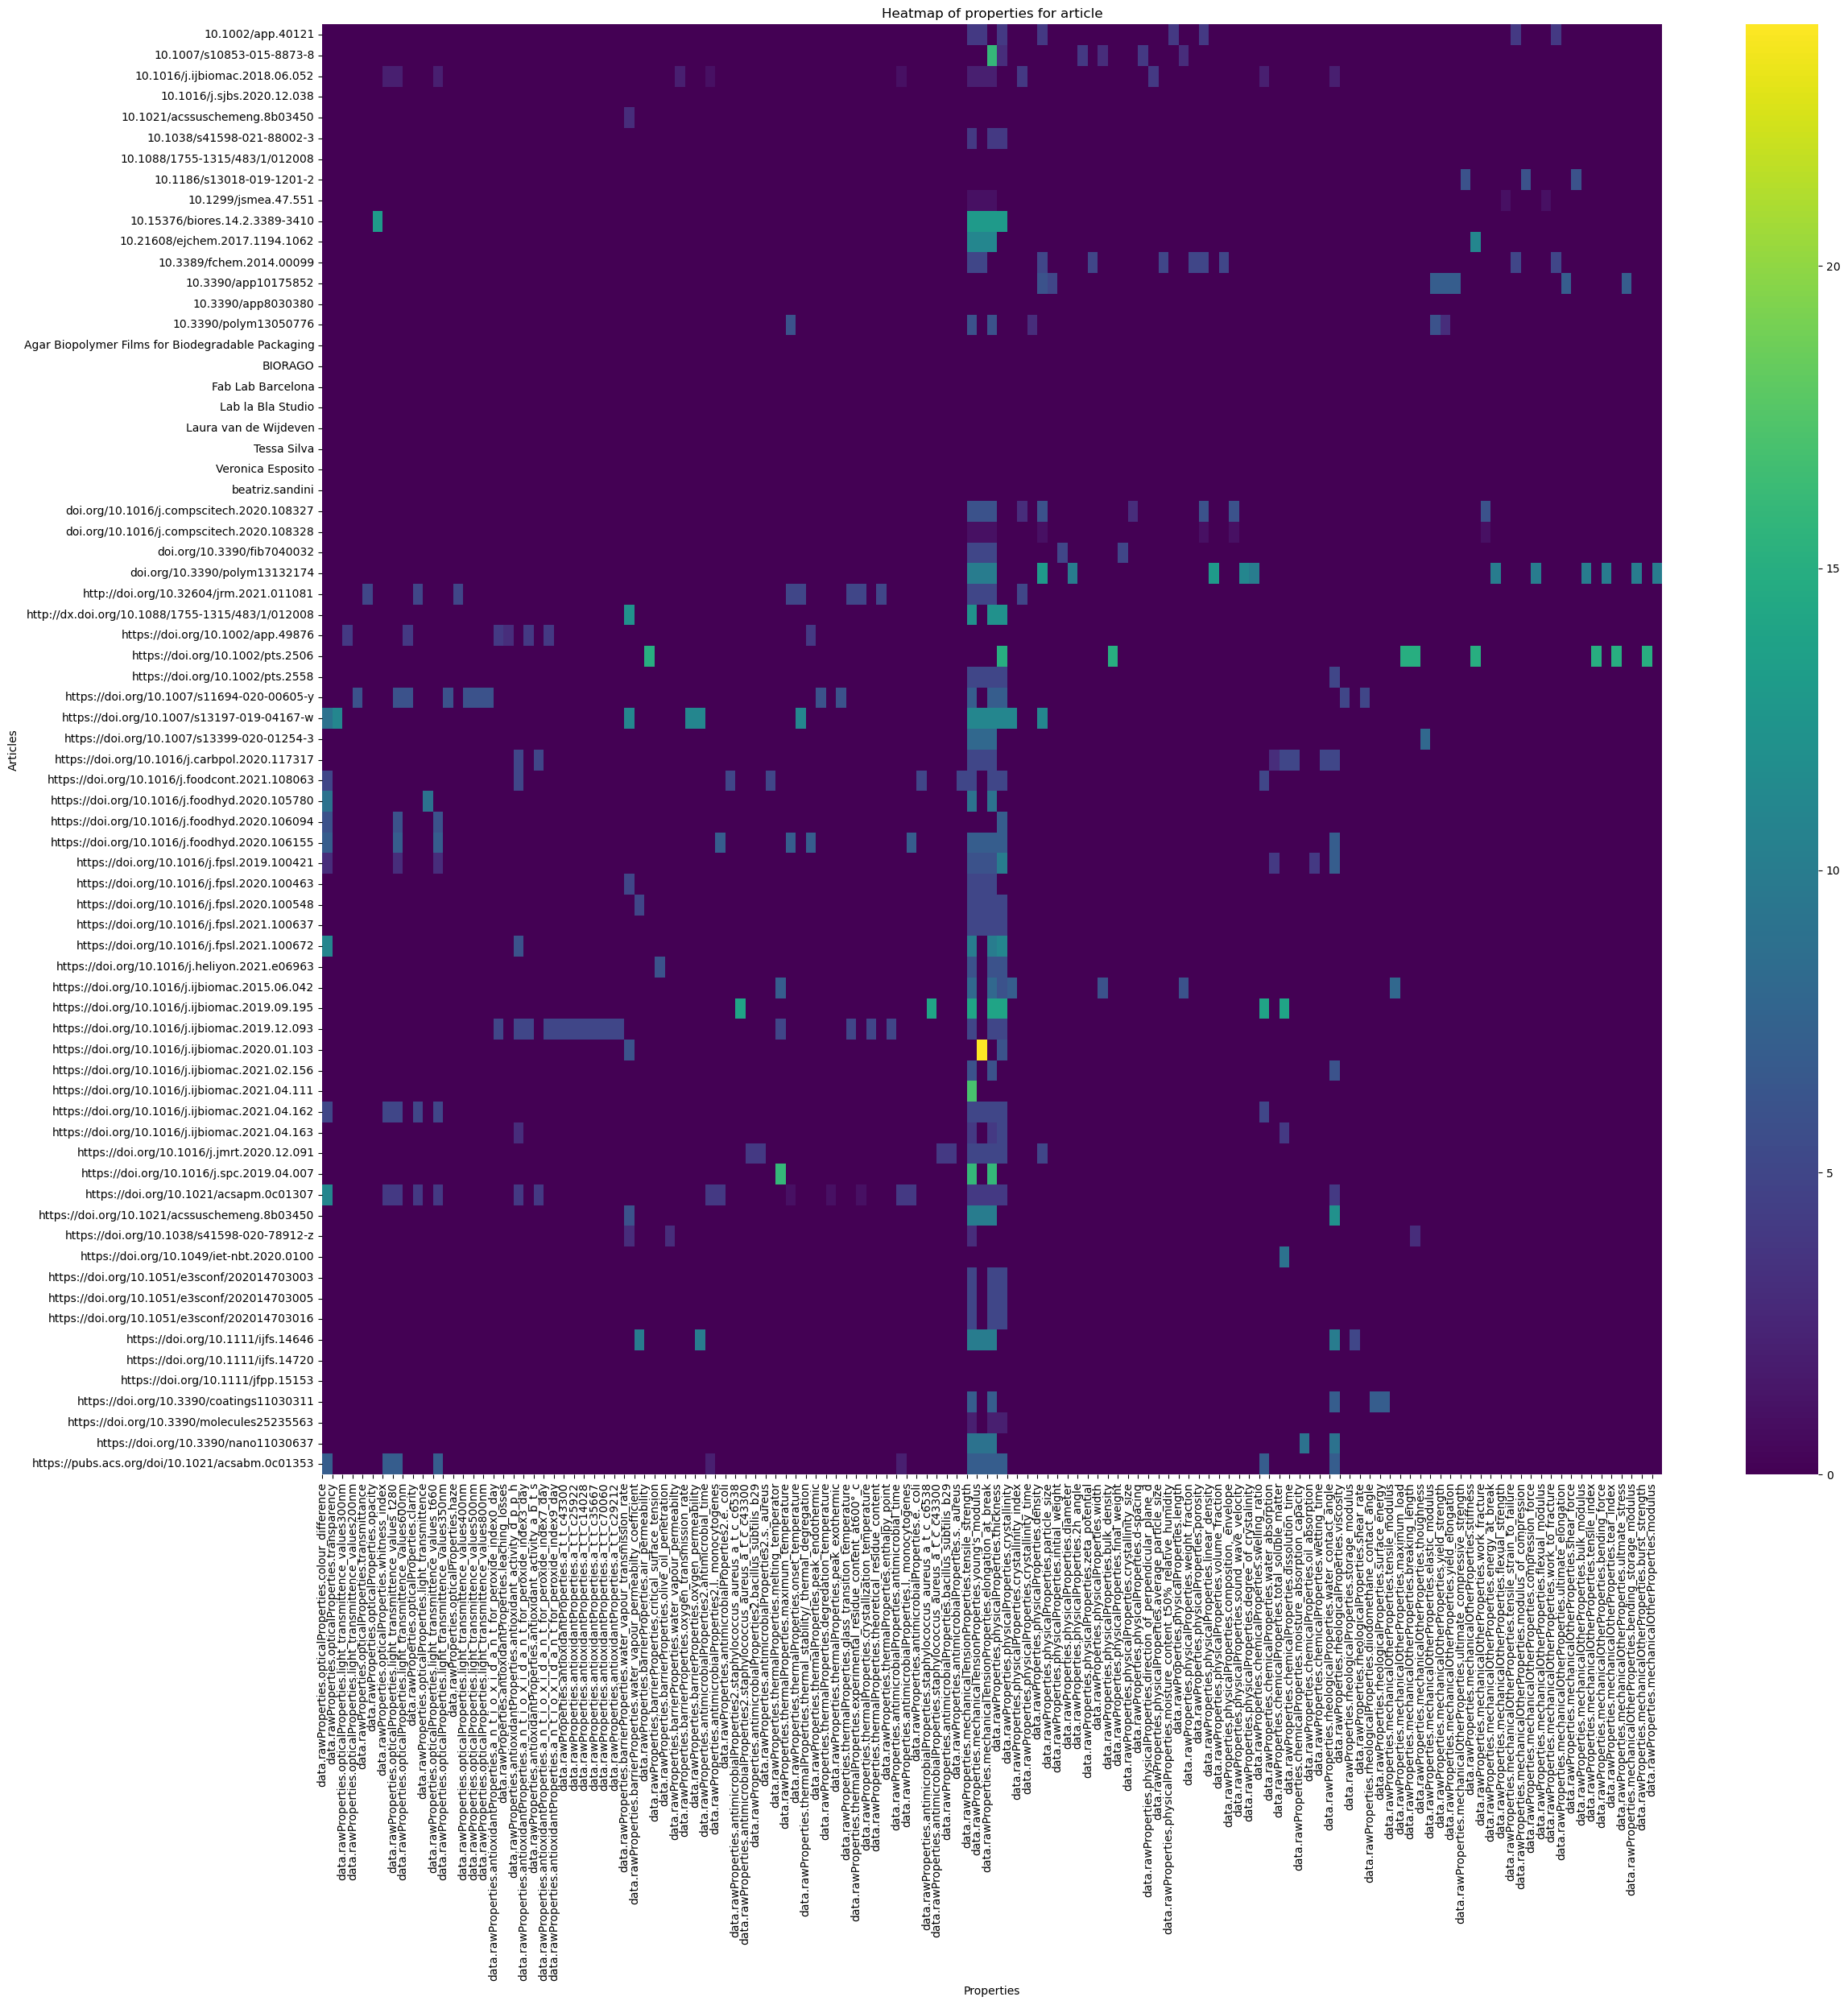

In [140]:
plt.figure(figsize=(25, 25))
heatmap_data  = grouped_data.set_index('data.details.sources_0.name')
ax = sns.heatmap(heatmap_data, cmap='viridis')

plt.title('Heatmap of properties for article')
plt.xlabel('Properties')
plt.ylabel('Articles')
plt.xticks(rotation=90)  # Rotar las etiquetas de las columnas
# Asegurar que todas las etiquetas del eje x sean visibles
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns)

# Ajustar el layout para evitar que se recorten las etiquetas
plt.tight_layout()
plt.show();